In [1]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np
import datetime
import matplotlib.dates as mdates

In [2]:
df = pd.read_csv('SUNPHARMA.csv')

df.isnull().sum()

Date                     0
Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2850
Deliverable Volume     528
%Deliverble            528
dtype: int64

In [3]:
df['Date'] = pd.to_datetime(df['Date'])

In [4]:
df = df[df["Date"] >= "2019-01-01"]

In [5]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
4729,2019-01-01,SUNPHARMA,EQ,430.50,432.50,438.8,429.65,432.70,433.55,435.01,8487116,3.691997e+14,91786.0,1524951.0,0.1797
4730,2019-01-02,SUNPHARMA,EQ,433.55,430.50,441.2,429.25,439.95,440.05,435.70,9656878,4.207479e+14,100434.0,3755920.0,0.3889
4731,2019-01-03,SUNPHARMA,EQ,440.05,442.05,443.6,434.00,434.90,436.10,439.97,9479511,4.170669e+14,112961.0,2912917.0,0.3073
4732,2019-01-04,SUNPHARMA,EQ,436.10,439.10,439.9,432.20,433.40,433.80,435.62,6228693,2.713361e+14,81360.0,1392009.0,0.2235
4733,2019-01-07,SUNPHARMA,EQ,433.80,437.10,438.0,429.30,430.85,430.80,433.19,4118235,1.783964e+14,64152.0,1444774.0,0.3508


In [6]:
X = df[['Prev Close','Date']].values
y = df[['Close']].values

In [7]:
X=X.reshape(-1,2)

In [8]:
print(X.shape)

(577, 2)


In [9]:
print(y.shape)

(577, 1)


In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [11]:
print(X_train)

[[429.05 Timestamp('2019-12-18 00:00:00')]
 [465.55 Timestamp('2019-04-12 00:00:00')]
 [564.35 Timestamp('2021-01-29 00:00:00')]
 [412.75 Timestamp('2019-05-31 00:00:00')]
 [446.4 Timestamp('2020-01-08 00:00:00')]
 [402.05 Timestamp('2019-06-11 00:00:00')]
 [575.0 Timestamp('2020-12-21 00:00:00')]
 [448.2 Timestamp('2019-05-08 00:00:00')]
 [499.15 Timestamp('2020-06-11 00:00:00')]
 [426.0 Timestamp('2019-12-30 00:00:00')]
 [643.65 Timestamp('2021-02-12 00:00:00')]
 [383.45 Timestamp('2019-06-25 00:00:00')]
 [469.4 Timestamp('2020-11-03 00:00:00')]
 [427.65 Timestamp('2019-12-11 00:00:00')]
 [479.95 Timestamp('2020-06-29 00:00:00')]
 [495.8 Timestamp('2020-09-15 00:00:00')]
 [409.9 Timestamp('2019-02-06 00:00:00')]
 [456.3 Timestamp('2020-05-06 00:00:00')]
 [400.9 Timestamp('2020-03-09 00:00:00')]
 [439.85 Timestamp('2020-01-10 00:00:00')]
 [428.8 Timestamp('2019-09-11 00:00:00')]
 [433.3 Timestamp('2019-07-17 00:00:00')]
 [332.7 Timestamp('2020-03-31 00:00:00')]
 [597.8 Timestamp('2021

In [12]:
print(X_test)

[[416.75 Timestamp('2019-08-28 00:00:00')]
 [508.85 Timestamp('2020-09-23 00:00:00')]
 [447.8 Timestamp('2020-01-27 00:00:00')]
 [552.55 Timestamp('2020-12-22 00:00:00')]
 [463.9 Timestamp('2020-05-13 00:00:00')]
 [574.55 Timestamp('2021-03-19 00:00:00')]
 [419.45 Timestamp('2019-05-15 00:00:00')]
 [422.1 Timestamp('2019-11-11 00:00:00')]
 [473.4 Timestamp('2020-04-21 00:00:00')]
 [582.3 Timestamp('2020-12-08 00:00:00')]
 [502.2 Timestamp('2020-10-15 00:00:00')]
 [421.2 Timestamp('2019-05-23 00:00:00')]
 [646.05 Timestamp('2021-04-19 00:00:00')]
 [454.4 Timestamp('2020-05-07 00:00:00')]
 [469.7 Timestamp('2019-04-03 00:00:00')]
 [440.7 Timestamp('2020-05-19 00:00:00')]
 [604.45 Timestamp('2021-03-02 00:00:00')]
 [463.2 Timestamp('2019-04-22 00:00:00')]
 [609.65 Timestamp('2021-01-13 00:00:00')]
 [455.95 Timestamp('2020-05-15 00:00:00')]
 [614.2 Timestamp('2021-03-03 00:00:00')]
 [495.1 Timestamp('2020-07-16 00:00:00')]
 [439.95 Timestamp('2019-07-29 00:00:00')]
 [404.95 Timestamp('2020

In [13]:
X_df = pd.DataFrame(X_train, columns=[['Prev Close','Date']])
y_df = pd.DataFrame(y_train, columns=['Close'])

In [14]:
print(X_df['Prev Close'])

    Prev Close
0       429.05
1       465.55
2       564.35
3       412.75
4        446.4
..         ...
456      414.6
457      444.4
458     485.65
459     394.65
460     610.75

[461 rows x 1 columns]


In [15]:
print(X_df['Date'])

          Date
0   2019-12-18
1   2019-04-12
2   2021-01-29
3   2019-05-31
4   2020-01-08
..         ...
456 2020-02-13
457 2019-01-14
458 2020-06-18
459 2019-10-15
460 2021-04-05

[461 rows x 1 columns]


In [16]:
# y_train=y_train.iloc[:0].values

In [17]:
regressor=LinearRegression()
regressor.fit(X_df[['Prev Close']],y_train)

LinearRegression()

In [18]:
Xtest_df = pd.DataFrame(X_test, columns=[['Prev Close','Date']])

In [19]:
y_pred=regressor.predict(Xtest_df[['Prev Close']])

In [20]:
r2_score(y_test,y_pred)

0.9817570938329567

In [21]:
print(Xtest_df)

    Prev Close       Date
0       416.75 2019-08-28
1       508.85 2020-09-23
2        447.8 2020-01-27
3       552.55 2020-12-22
4        463.9 2020-05-13
..         ...        ...
111     399.25 2019-06-10
112     400.95 2019-07-01
113     449.85 2020-01-24
114      584.0 2020-12-31
115      523.1 2020-10-06

[116 rows x 2 columns]


In [22]:
print(y_test)

[[413.1 ]
 [502.9 ]
 [448.4 ]
 [568.3 ]
 [452.35]
 [578.3 ]
 [409.75]
 [421.45]
 [473.15]
 [568.7 ]
 [490.3 ]
 [412.95]
 [640.65]
 [452.2 ]
 [462.  ]
 [441.7 ]
 [614.2 ]
 [454.5 ]
 [602.3 ]
 [448.6 ]
 [624.35]
 [499.7 ]
 [431.05]
 [397.85]
 [434.95]
 [485.6 ]
 [511.75]
 [416.8 ]
 [485.55]
 [454.45]
 [479.95]
 [427.  ]
 [426.55]
 [440.7 ]
 [631.5 ]
 [386.05]
 [431.25]
 [520.8 ]
 [459.1 ]
 [429.7 ]
 [398.3 ]
 [429.9 ]
 [643.4 ]
 [506.15]
 [440.05]
 [440.  ]
 [474.5 ]
 [383.95]
 [472.95]
 [646.05]
 [541.05]
 [418.95]
 [485.8 ]
 [605.5 ]
 [522.3 ]
 [582.9 ]
 [417.  ]
 [525.1 ]
 [501.9 ]
 [456.35]
 [452.45]
 [475.5 ]
 [525.95]
 [436.7 ]
 [623.6 ]
 [437.95]
 [452.9 ]
 [584.75]
 [590.45]
 [412.  ]
 [564.35]
 [429.8 ]
 [430.65]
 [512.45]
 [366.8 ]
 [571.65]
 [414.6 ]
 [365.25]
 [565.2 ]
 [528.95]
 [463.15]
 [499.15]
 [423.  ]
 [531.35]
 [473.1 ]
 [460.55]
 [539.35]
 [604.05]
 [427.65]
 [375.95]
 [476.15]
 [479.25]
 [461.  ]
 [422.95]
 [415.05]
 [405.45]
 [513.25]
 [419.45]
 [493.2 ]
 [434.3 ]


In [23]:
print(y_pred)

[[417.32543378]
 [509.48232951]
 [448.39461524]
 [553.20932564]
 [464.50456118]
 [575.22291637]
 [420.02710173]
 [422.67873879]
 [474.0104299 ]
 [582.97770401]
 [502.8282214 ]
 [421.77818281]
 [646.76708624]
 [454.99869246]
 [470.30814419]
 [441.29022914]
 [605.14138741]
 [463.80412875]
 [610.34459976]
 [456.54964998]
 [614.89741057]
 [495.7238353 ]
 [440.53976582]
 [405.5181442 ]
 [434.88627547]
 [476.61203608]
 [521.68986619]
 [410.42117123]
 [478.06293183]
 [437.2877581 ]
 [488.26923299]
 [429.18275424]
 [454.3983218 ]
 [449.19510944]
 [629.90667698]
 [388.70776583]
 [437.18769632]
 [532.79672333]
 [451.49653029]
 [422.92889323]
 [391.309372  ]
 [438.5385303 ]
 [639.96288547]
 [510.73310171]
 [434.13581215]
 [450.44588165]
 [485.11728704]
 [380.4526693 ]
 [482.61574264]
 [633.95917891]
 [544.50395112]
 [398.8640361 ]
 [503.52865384]
 [614.29703991]
 [526.04255344]
 [595.38536424]
 [421.47799748]
 [534.09752642]
 [513.88504766]
 [464.0042523 ]
 [451.44649941]
 [486.21796658]
 [532.89

In [24]:
y_pred = pd.DataFrame(y_pred, columns=['Close'])

In [25]:
y_test = pd.DataFrame(y_test, columns=['Close'])

In [26]:
X_plot = Xtest_df.iloc[:,-1:]

In [27]:
new_df = pd.merge(X_plot, y_pred, left_index=True, right_index=True)

In [28]:
old_df = pd.merge(X_plot, y_test, left_index=True, right_index=True)

In [29]:
print(new_df)


       (Date,)       Close
0   2019-08-28  417.325434
1   2020-09-23  509.482330
2   2020-01-27  448.394615
3   2020-12-22  553.209326
4   2020-05-13  464.504561
..         ...         ...
111 2019-06-10  399.814623
112 2019-07-01  401.515673
113 2020-01-24  450.445882
114 2020-12-31  584.678754
115 2020-10-06  523.741133

[116 rows x 2 columns]


In [30]:
columns = new_df.columns
print(columns)

Index([('Date',), 'Close'], dtype='object')


In [31]:
new_df[('Date',)] = pd.to_datetime(new_df[('Date',)])

In [32]:
old_df[('Date',)] = pd.to_datetime(old_df[('Date',)])

In [33]:
new_df = new_df.sort_values(by=[('Date',)])

In [34]:
old_df = old_df.sort_values(by=[('Date',)])

In [35]:
new_df.rename(columns={('Date',): 'Date'}, inplace=True)
old_df.rename(columns={('Date',): 'Date'}, inplace=True)
new_df.rename(columns={'Close': 'Predicted Price'}, inplace=True)
old_df.rename(columns={'Close': 'Actual Price'}, inplace=True)

In [36]:
print(old_df)

         Date  Actual Price
44 2019-01-02        440.05
60 2019-01-15        452.45
32 2019-01-17        426.55
40 2019-01-21        398.30
51 2019-01-22        418.95
..        ...           ...
67 2021-03-17        584.75
5  2021-03-19        578.30
49 2021-04-16        646.05
12 2021-04-19        640.65
42 2021-04-28        643.40

[116 rows x 2 columns]


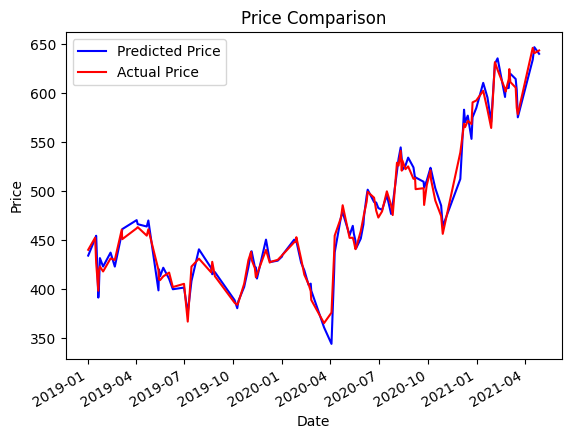

In [37]:
new_df.set_index('Date', inplace=True)
old_df.set_index('Date', inplace=True)

ax = new_df.plot(color='blue')
old_df.plot(ax=ax, color='red')
plt.title('Price Comparison')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='best')
plt.show()